In [11]:
# visuaiize the data
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# 分辨率
plt.rcParams['figure.dpi'] = 300

data_dir = '../data'
data = pd.read_csv(os.path.join(data_dir, 'SSE.csv'))
data.head()
# date time index
data['trade_date'] = pd.to_datetime(data['trade_date'], format='%Y%m%d')
data = data.set_index('trade_date')
data.head()

,ts_code,close,open,high,low,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2010-01-04,000001.SH,3243.760,3289.750,3295.279,3243.319,3277.139,-33.379,-1.0185,109447927.0,1.337735e+08
2010-01-05,000001.SH,3282.179,3254.468,3290.512,3221.462,3243.760,38.419,1.1844,126115066.0,1.618582e+08
2010-01-06,000001.SH,3254.215,3277.517,3295.868,3253.044,3282.179,-27.964,-0.8520,123651384.0,1.580401e+08
2010-01-07,000001.SH,3192.776,3253.991,3268.819,3176.707,3254.215,-61.439,-1.8880,128652827.0,1.572296e+08
2010-01-08,000001.SH,3195.997,3177.259,3198.920,3149.017,3192.776,3.221,0.1009,98377147.0,1.217399e+08


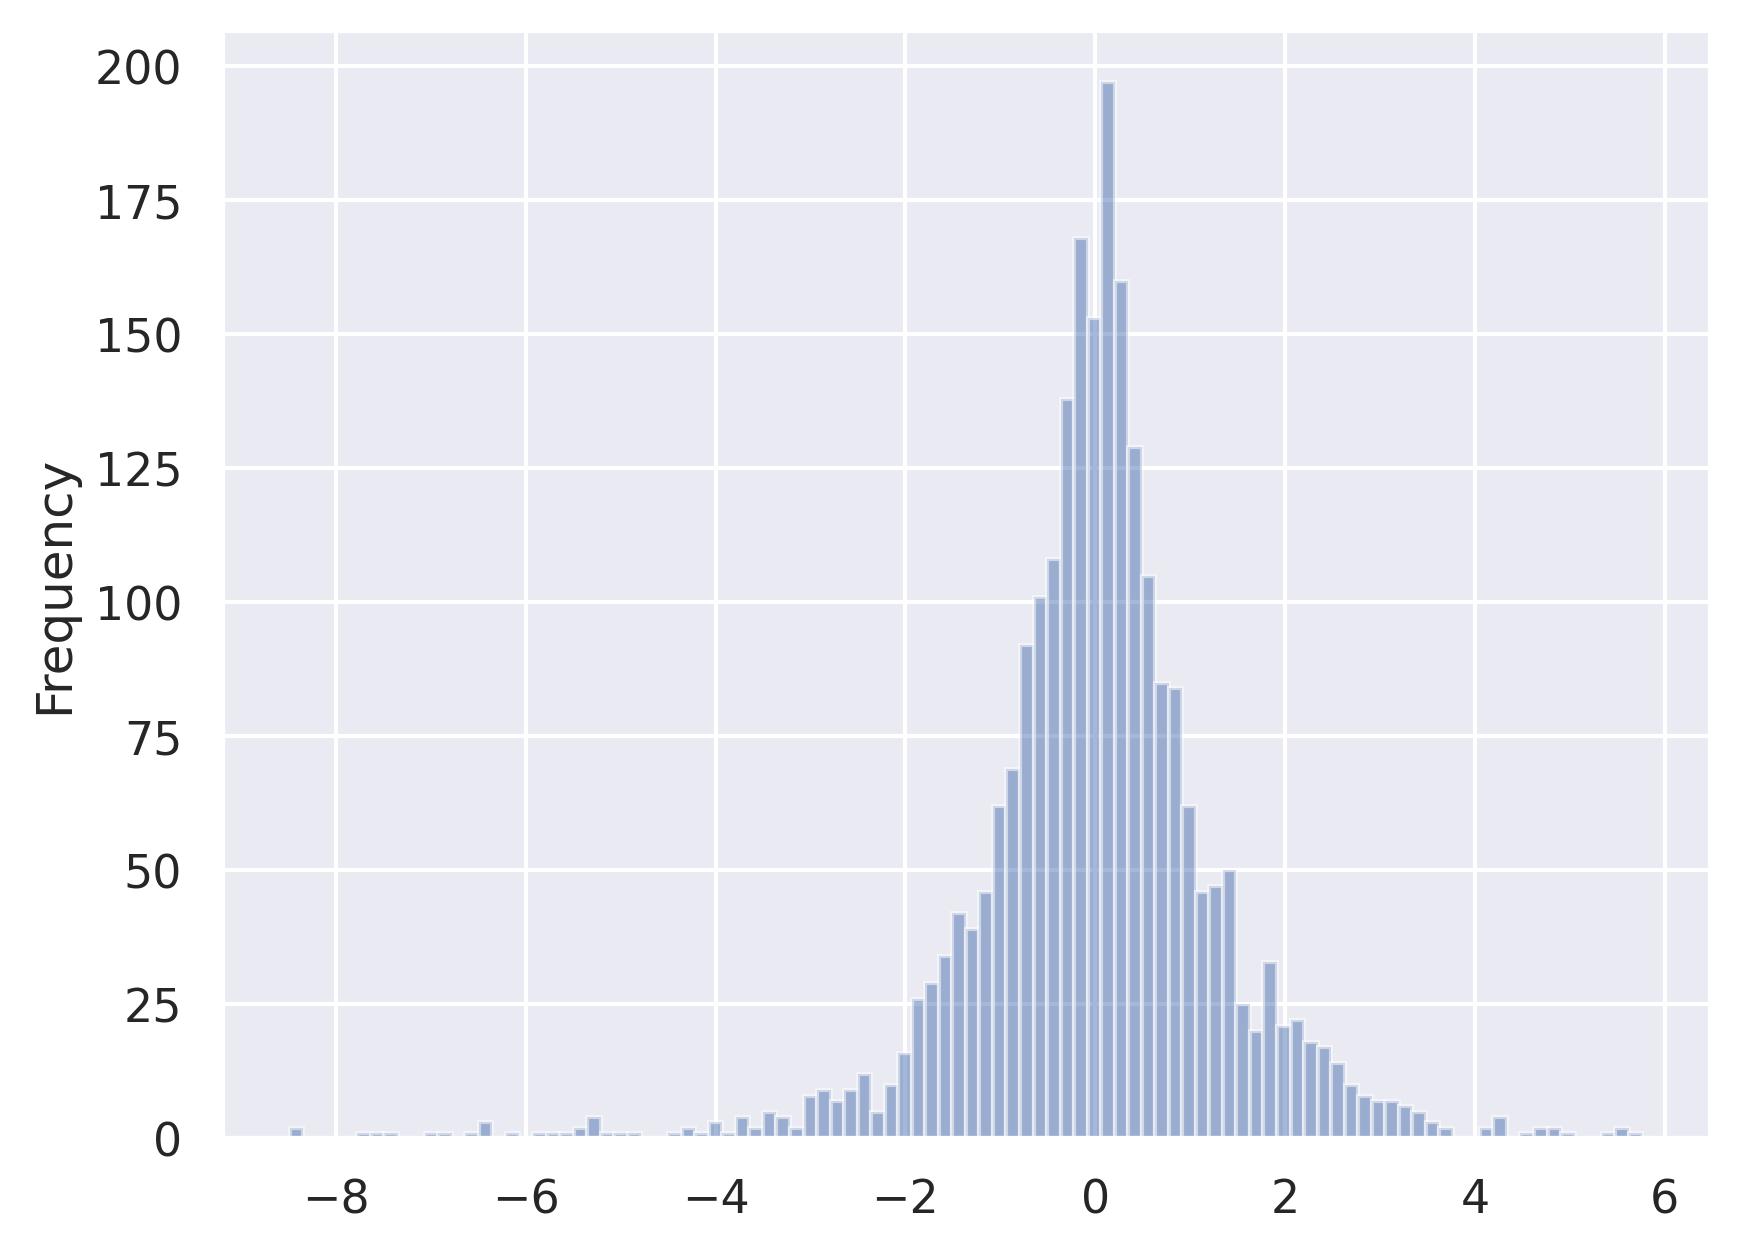

In [14]:
# 画收益率分布，验证尖峰厚尾
data['pct_chg'].plot.hist(bins=100, alpha=0.5)
plt.savefig(os.path.join(data_dir, 'SEE_return_distribution.png'))
plt.show()



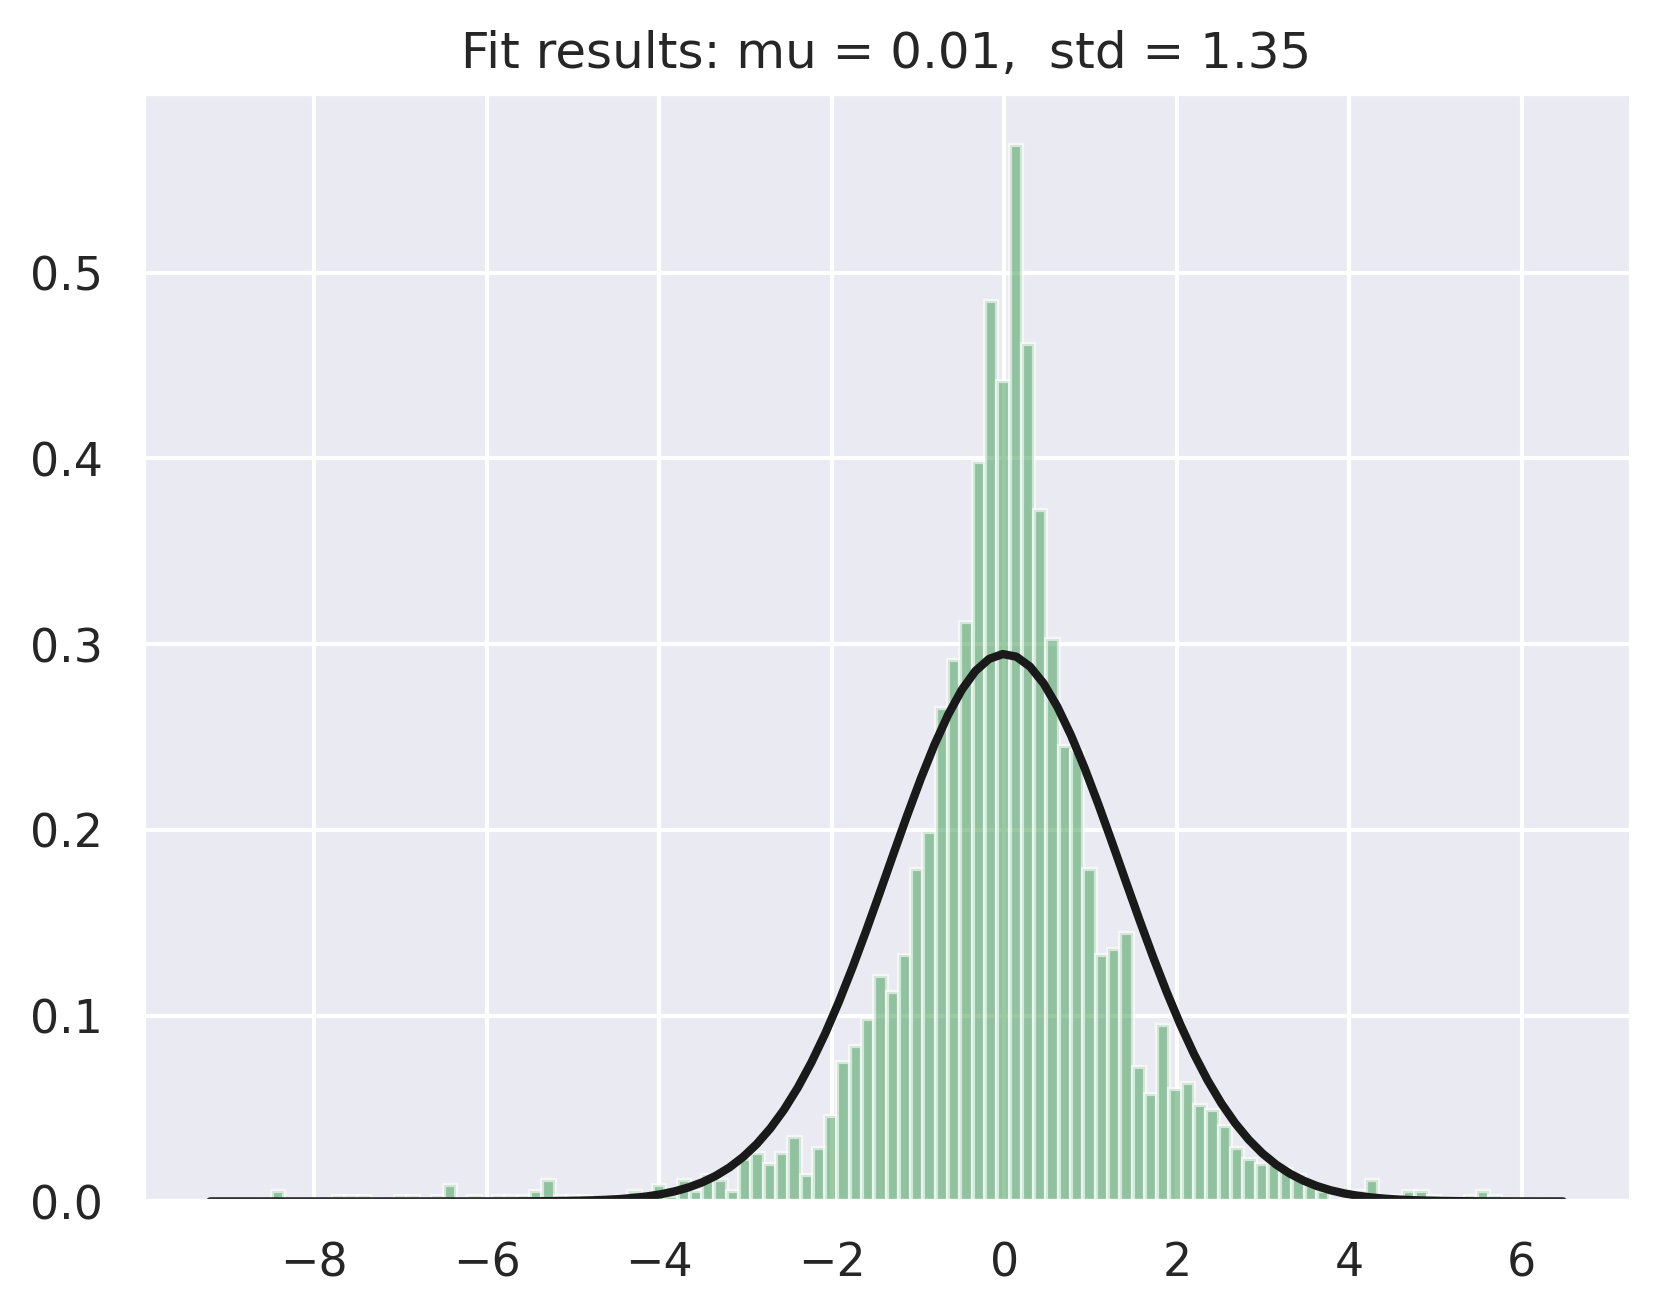

In [15]:
# 拟合正态分布
from scipy.stats import norm
import numpy as np
# 拟合正态分布
mu, std = norm.fit(data['pct_chg'])
# 画图
plt.hist(data['pct_chg'], bins=100, density=True, alpha=0.6, color='g')
# 画拟合曲线
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.savefig(os.path.join(data_dir, 'SEE_return_distribution_fit.png'))
plt.show()


1
mean: [0.04311085]
std: [[0.80575289]]
weight: 0.7632546420131077
2
mean: [-0.11242976]
std: [[2.37238827]]
weight: 0.2367453579868923


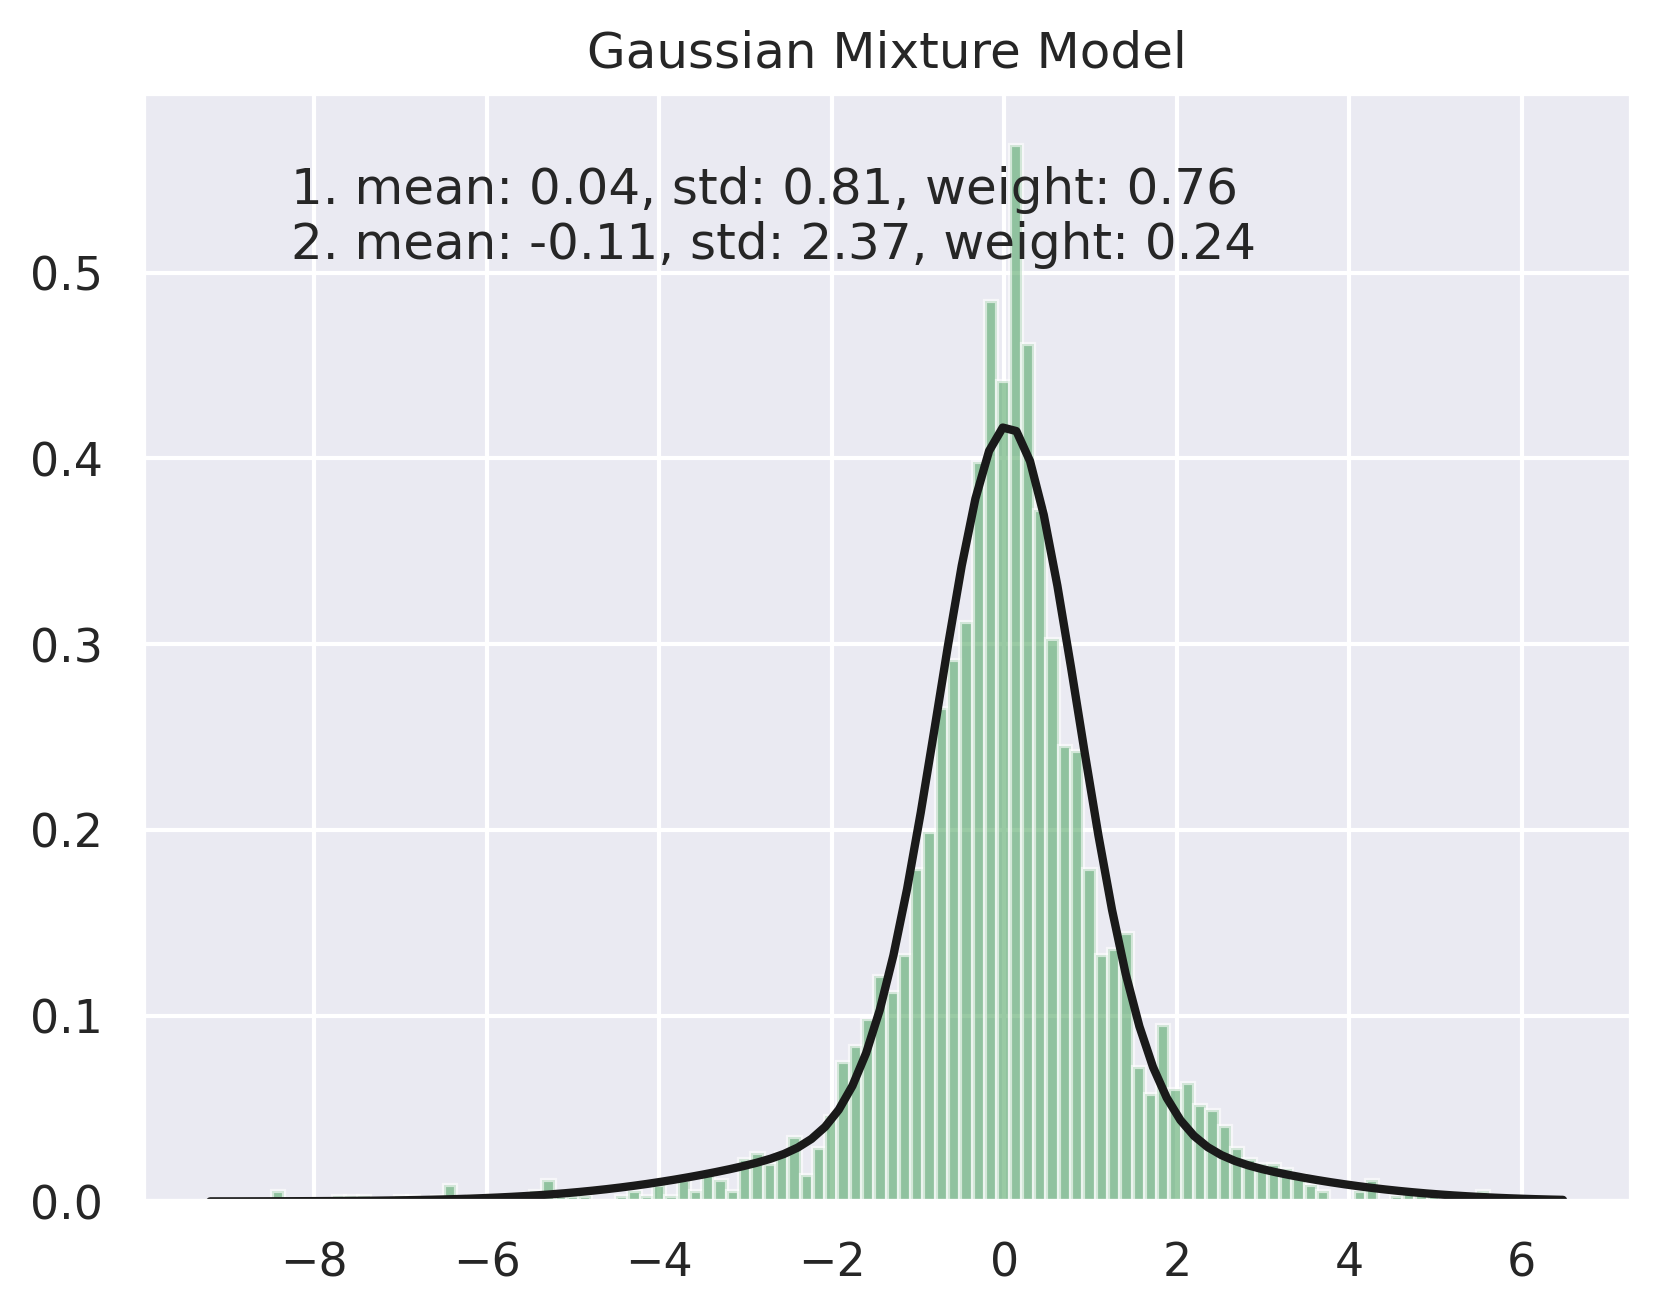

In [40]:
# 拟合高斯混合分布
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='full').fit(data['pct_chg'].values.reshape(-1, 1))
# 画图
plt.hist(data['pct_chg'], bins=100, density=True, alpha=0.6, color='g')
# 画拟合曲线
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = gmm.score_samples(x.reshape(-1, 1))
plt.plot(x, np.exp(p), 'k', linewidth=2)


# 输出两个混合分布参数
for i in range(2):
    print(i+1)
    print('mean:', gmm.means_[i])
    print('std:', np.sqrt(gmm.covariances_[i]))
    print('weight:', gmm.weights_[i])

# 分布参数作为注释, 居中显示
plt.annotate('1. mean: %.2f, std: %.2f, weight: %.2f \n2. mean: %.2f, std: %.2f, weight: %.2f' % \
             (gmm.means_[0], np.sqrt(gmm.covariances_[0]), gmm.weights_[0],gmm.means_[1]\
              , np.sqrt(gmm.covariances_[1]), gmm.weights_[1]), xy=(0.1, 0.85), xycoords='axes fraction')

# 标题
plt.title('Gaussian Mixture Model')


plt.savefig(os.path.join(data_dir, 'SEE_return_distribution_fit.png'))
plt.show()